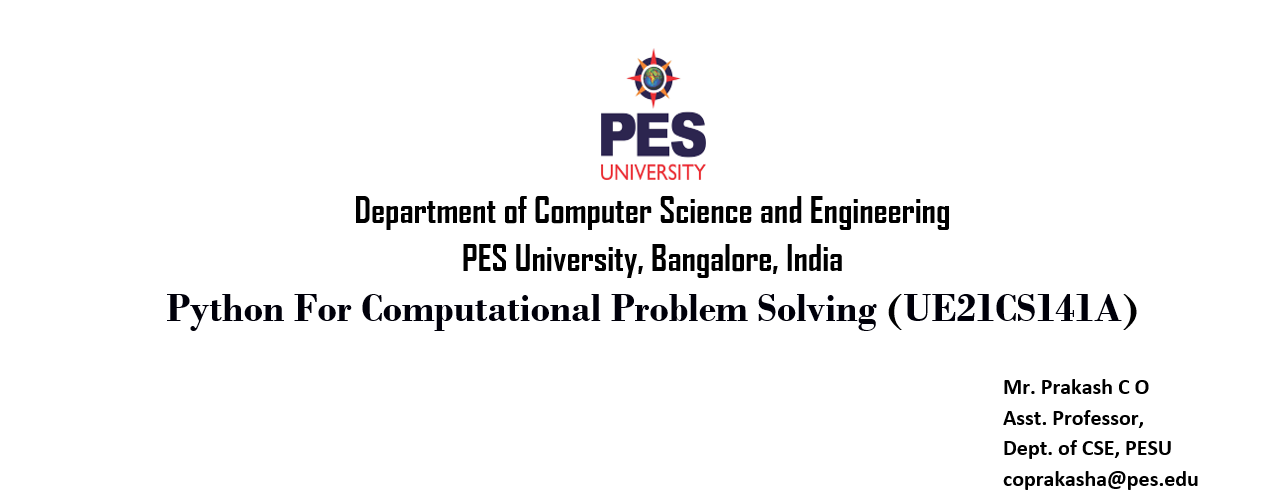

### User defined function:
A function is a self-contained block of code that performs a specific task.
Functions ideally take input, performs a set of operations and returns an output to the program that invoked it.

A function is a named piece of code. We write a sequence of Python code and then give a name to it. We can then refer and run the whole code by using its name.

###### Why do we use this concept of function? When do we use this?

•	A function is expected to do one and only thing. We call such a function cohesive. Because it has a clearly defined aim, the code will be small, neat and clean.

•	Similar functionality is normally required at number of places. If we write a function, then we can call or invoke the function without rewriting or copying the code. It makes the user’s program more readable.

•	If the code of the function has to be changed for whatever reason – make it more efficient, make it more flexible – we have to do at only one place. Thus it helps in maintenance.

•	Once tested, the function can be used with total assurance. There is no necessity of debugging the code repeatedly.

###### Types of functions:
* Built in – existing functions
* User defined – defined by user

###### We use functions for the following reasons:
* Supports modularity
* Promotes reuse of code
* Enhances readability
* Debugging and maintainance becomes easier

##### Function Definition and Invocation:

###### Function Definition:

A function has two parts – leader and suite.
* The leader starts with the keyword def
* then the function name
    * function name is an identifier, start with a letter of english or _ and then followed by any number of letter of english or _ or digit
* then a pair of parentheses
* then a colon
* then the suite follows – suite can have any valid statement of Python including another function definition!
* Within the parentheses, we may have parameters – we shall discuss them at length later.



###### Example of a function definition.
Run the program under Python tutor to understand how the function definition and function call are processed.




In [1]:
# example of function definition and invocation
def foo() :
    print("I am foo")
    return

print("one")
foo()
print("two")

one
I am foo
two


#### Processing of Function Definition:   
Name of the function followed by parentheses causes a function call – this results in transfer of control to the leader of the function and then the suite is executed – after that the control comes back to the point after the function call in the user’s code.
A few more things happen when the function call is mapped to the function leader. We shall discuss them later.

In our example, leader of function foo is processed first and the function entity with the name foo is created. The suite of foo is not processed at this point. print(“one”) is called displaying the string one. Then foo is called – transferring control to the leader of foo – then the suite of foo is executed resulting in display of the string I am foo. Then the control is returned. Then print is called displaying the string two.

Note: Processing of function definition demo with http://pythontutor.com/  


#### Function Definition and Function Name – internals:
Let us examine the below code to understand two things.
* What does the function name stand for?
* What happens when the function is defined?

In [1]:
# foo : is a function; therefore callable

def foo() :
    print("I am foo")

print("one")
foo # no function call

print("two")
#print(foo) # <function foo at 0x________>

bar = foo # bar also becomes callable
#print(bar) # <function foo at 0x________>

# both give the same output
foo()
bar()

# remove foo
del foo
bar() # still works!

one
two
I am foo
I am foo
I am foo


When the function is defined, the function name becomes an interface for us to refer to the function. The function entity is stored with the name used in the definition along with the suite. Whatever is stored with the function entity remains unchanged until no name refers to it. Each entity in Python has a reference count. It is equally true of the function entity.

foo # no function call
###### This above statement does not result in a function call. The function name like a variable name is an expression. Any expression on a line is also a statement. But it does not cause a function call. To invoke a function, we do require the function call operator - a pair of parentheses.

bar = foo

###### This is like a variable assignment. Both foo and bar refer to the function entity called foo. The reference count of the function entity goes up by 1 and in this case, becomes 2.

If we display either bar or foo, we get the same output as both refer to the same function entity foo.

We can invoke the function either by using the name foo or bar. We say that both are callable. A callable is the name of a defned function or a variable holding the function name.

del foo

This statement causes the name foo to be removed and the reference count of the function entity foo to be decremented. As bar still refers to the same function entity, the reference count would not be zero. Therefore the function entity foo remains and can be called using the name bar.

bar() # still works!


##### Function call: arguments and parameters:
A function does some task for us. It requires some values to operator on. We provide them when calling a function. We put these within parentheses in the function call. We call them arguments. The arguments are always expressions. They should have some value.

add(4,5)

In the function definition, we specify variables which receive these arguments. These are called parameters. The parameters are always variables.

def add(x,y):
    return(x+y)

When the function call is made, the control is transferred to the function definition. The arguments are evaluated and copied to the corresponding parameters. This is called parameter passing by value or call by value.

In [6]:
def add(x,y):
    return(x+y)
print(add(4,5))

9


In [10]:
import math
# a, b : parameters; always variables
def hyp(a, b) :
    print("in hyp function")
    # can create variables within the function; local variables
    h = math.sqrt(a * a + b * b)
    print("hyp of triangle with sides : ", a , 'and', b, 'is ', h)

print("one")
hyp(5, 12) #5, 12 : arguments : are expressions; should have some value
hyp(3, 4)

#hyp(3, 4, 5) # TypeError: hyp() takes 2 positional arguments but 3 were given
#hyp(3) # TypeError: hyp() missing 1 required positional argument: 'b'

one
in hyp function
hyp of triangle with sides :  5 and 12 is  13.0
in hyp function
hyp of triangle with sides :  3 and 4 is  5.0


Number of arguments should match the number of parameters

hyp(3, 4, 5) # error

hyp(3) # error

The above example shows how to compute hypotenuse given the two limbs of a right angled triangle.
In this example the arguments are constants – they can be any type of expression in general. The corresponding parameters are always variables.

##### In Python, parameters do not have any fixed type. So, we say that the types are generic.

##### When the function call is made, an activation record is created which will have

* Parameters
* local variables 
    * Variables created within the suite of the function 
* return address
    * Location to which the control of the program should be transferred once the function terminates
* temporary variables
    * unnamed variables required by the translator
* return value
    * value to be passed back to the caller

At the end of the function execution, when the control returns to the calling program, the activation record is deleted and cannot be accessed again.

If we want to access a value that was calculated within the function, we must ensure to return it to the calling program explicitly.

If we call the function again in the program, a new activation is created for that instance of the function execution

In [21]:
# Lets examine, using Pythontutor
def area_rect(x,y) :
    a=x*y
    return a
a=area_rect(5,6)
print("Area of rectanle =",a)

Area of rectanle = 30


##### Function call and return mechanism:

In [12]:
import math
# a, b : parameters; always variables
# A function by default returns nothing - called None in Python

def hyp(a, b) :
    h = math.sqrt(a * a + b * b) #local to the fn

res = hyp(3, 4)
#print("h : ", h) # not available here
print(res, type(res)) # None of NoneType

None <class 'NoneType'>


In [11]:
def hyp1(a, b) :
    h = math.sqrt(a * a + b * b) #local to the fn
    return h # returns the value of the expression

res = hyp1(3, 4)
print(res, type(res)) 

5.0 <class 'float'>


##### A called function(Callee) returns the control to the caller when
* the end of the function body is reached
* the return statement is executed.

The return statement is also used to return a value to the caller. The function does not specify a return type in its definition. 

There is no default return mechanism. In the case of the function hyp, there is no return statement in the suite of the function. So, the caller is returned a notional value None of NoneType. This is similar to void functions of ‘C’.

In the second case, the function hyp1 returns h as the result. The value of this expression(in this case, a variable) is returned to the caller.


###### A function can return a value of any type. There is no restriction in Python.

In [19]:
# given two strings, find common letters.

def find_common(s1, s2):
    set1 = set(s1); 
    set2 = set(s2)
    res = ""
    for ch in set1 & set2:
        res += ch
    return res

s1 = "cattle"
s2 = "concat"
# expected output : c a t
print("common letters : ", find_common(s1, s2))

s3 = "horse"
print("common letters : ", find_common(s1, s3))

s4 = "zzzzz"
print("common letters : ", find_common(s1, s4))

s5 = "abcde"
s6 = "acdeb"
print("common letters : ", find_common(s5, s6))

common letters :  tca
common letters :  e
common letters :  
common letters :  bceda


In [14]:
# output length of words in a string
def disp_count(s):
    wordlist = s.split()
    for word in wordlist:
        print("{} = {}".format(word,len(word)))

disp_count("we are the world")

we = 2
are = 3
the = 3
world = 5


In [20]:
# Exercise: What is the output?

def f1():
    print('cool day')
    return f3()
def f3():
    return'cool'    
        
f1()

cool day


'cool'

###### What would happen if we write statements after we have written a return statement?
Consider the following snippet of code

In [24]:
def example():
    print('an example function')
    return
    print('after return')
example()

an example function


In this function, the control returns as soon as the interpreter encounters the return statement, making the print statement after it an unreachable code.

##### Returning Multiple Values
When we return a collection of values, the interpreter puts it together into a tuple and returns it to the calling program

In [26]:
def add():
    a = 12
    b = 13
    s = a+b
    return s,a,b # becomes an unnamed tuple
sum = add()
print(type(add)) #type <class function>
print(type(sum)) #type <class tuple>
print(sum) 

<class 'function'>
<class 'tuple'>
(25, 12, 13)
